Deep Learning
=============

Assignment 1
---------

The objective of this assignment is to learn about simple data curation practices, and familiarize you with some of the data we'll be reusing later.

This notebook uses the [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) dataset to be used with python experiments. This dataset is designed to look like the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, while looking a little more like real data: it's a harder task, and the data is a lot less 'clean' than MNIST.

In [2]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
import matplotlib.pyplot as plt
import numpy as np
import os
import tarfile
import urllib
from IPython.display import display, Image, HTML
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
import cPickle as pickle
%matplotlib inline

First, we'll download the dataset to our local machine. The data consists of characters rendered in a variety of fonts on a 28x28 image. The labels are limited to 'A' through 'J' (10 classes). The training set has about 500k and the testset 19000 labelled examples. Given these sizes, it should be possible to train models quickly on any machine.

In [2]:
url = 'http://yaroslavvb.com/upload/notMNIST/'

def maybe_download(filename, expected_bytes):
  """Download a file if not present, and make sure it's the right size."""
  if not os.path.exists(filename):
    filename, _ = urllib.urlretrieve(url + filename, filename)
  statinfo = os.stat(filename)
  if statinfo.st_size == expected_bytes:
    print 'Found and verified', filename
  else:
    raise Exception(
      'Failed to verify' + filename + '. Can you get to it with a browser?')
  return filename

train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)

Found and verified notMNIST_large.tar.gz
Found and verified notMNIST_small.tar.gz


Extract the dataset from the compressed .tar.gz file.
This should give you a set of directories, labelled A through J.

In [3]:
num_classes = 10

def extract(filename):
  tar = tarfile.open(filename)
  tar.extractall()
  tar.close()
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  data_folders = [os.path.join(root, d) for d in sorted(os.listdir(root))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_folders, len(data_folders)))
  print data_folders
  return data_folders

In [4]:
train_folders = extract(train_filename)
test_folders = extract(test_filename)

['notMNIST_large/A', 'notMNIST_large/B', 'notMNIST_large/C', 'notMNIST_large/D', 'notMNIST_large/E', 'notMNIST_large/F', 'notMNIST_large/G', 'notMNIST_large/H', 'notMNIST_large/I', 'notMNIST_large/J']
['notMNIST_small/A', 'notMNIST_small/B', 'notMNIST_small/C', 'notMNIST_small/D', 'notMNIST_small/E', 'notMNIST_small/F', 'notMNIST_small/G', 'notMNIST_small/H', 'notMNIST_small/I', 'notMNIST_small/J']


---
Problem 1
---------

Let's take a peek at some of the data to make sure it looks sensible. Each exemplar should be an image of a character A through J rendered in a different font. Display a sample of the images that we just downloaded. Hint: you can use the package IPython.display.

---

In [42]:
## count files in the folders
for s in train_folders:
    print s
    print len([name for name in os.listdir(s)])

notMNIST_large/A
52912
notMNIST_large/B
52912
notMNIST_large/C
52912
notMNIST_large/D
52912
notMNIST_large/E
52912
notMNIST_large/F
52912
notMNIST_large/G
52912
notMNIST_large/H
52912
notMNIST_large/I
52912
notMNIST_large/J
52911


In [115]:
## look at a random image
import random
myfolder = 'notMNIST_small/A'
img = random.choice(os.listdir(myfolder))
myimg = os.path.join(myfolder, img)
print myimg
Image(myimg)

notMNIST_small/A/RW5ncmF2ZXJzJyBSb21hbiBCVC50dGY=.png


In [70]:
## look at samples from train_folders
## see, nbviewer.jupyter.org/github/PBrockmann/Dodecahedron/blob/master/Dodecahedron.ipynb

imagesList=''.join( ["<img style='width: 84px; margin: 0px; float: left; border: 1px solid yellow;' src='%s' />" %\
                     os.path.join(s, random.choice(os.listdir(s))) for s in train_folders ])
display(HTML(imagesList))

In [112]:
## look at samples from test_folders
imagesList=''.join( ["<img style='width: 84px; margin: 0px; float: left; border: 1px solid yellow;' src='%s' />" %\
                     os.path.join(s, random.choice(os.listdir(s))) for s in test_folders ])
display(HTML(imagesList))

Converting image to array
----------------
http://docs.scipy.org/doc/scipy/reference/ndimage.html

In [146]:
## look at ndimage reading of img file
pixel_depth = 255.0
print ndimage.imread(myimg)[27,:]
print ((ndimage.imread(myimg).astype(float) - pixel_depth / 2) / pixel_depth)[27,:]

[255 255 254 255 255 253 255 243   8   0   1   0   0   0   0   0   0   3
   0  79 255 255 255 255 255 254 255 255]
[ 0.5         0.5         0.49607843  0.5         0.5         0.49215686
  0.5         0.45294118 -0.46862745 -0.5        -0.49607843 -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.48823529 -0.5
 -0.19019608  0.5         0.5         0.5         0.5         0.5
  0.49607843  0.5         0.5       ]


http://matplotlib.org/users/image_tutorial.html

In [188]:
## look at mpimg reading of file
import matplotlib.image as mpimg
print mpimg.imread(myimg)[27,:]
print ((mpimg.imread(myimg).astype(float) - pixel_depth / 2) / pixel_depth)[27,:]

[ 1.          1.          0.99607843  1.          1.          0.99215686
  1.          0.95294118  0.03137255  0.          0.00392157  0.          0.
  0.          0.          0.          0.          0.01176471  0.
  0.30980393  1.          1.          1.          1.          1.
  0.99607843  1.          1.        ]
[-0.49607843 -0.49607843 -0.49609381 -0.49607843 -0.49607843 -0.49610919
 -0.49607843 -0.49626298 -0.49987697 -0.5        -0.49998462 -0.5        -0.5
 -0.5        -0.5        -0.5        -0.5        -0.49995386 -0.5
 -0.49878508 -0.49607843 -0.49607843 -0.49607843 -0.49607843 -0.49607843
 -0.49609381 -0.49607843 -0.49607843]


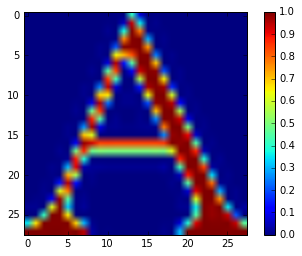

In [196]:
plt.imshow(mpimg.imread(myimg))
plt.colorbar()

Loading data
------------
Now let's load the data in a more manageable format.

We'll convert the entire dataset into a 3D array (image index, x, y) of floating point values, normalized to have approximately zero mean and standard deviation ~0.5 to make training easier down the road. The labels will be stored into a separate array of integers 0 through 9.

A few images might not be readable, we'll just skip them.

In [186]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load(data_folders, min_num_images, max_num_images):
  dataset = np.ndarray(
    shape=(max_num_images, image_size, image_size), dtype=np.float32)
  labels = np.ndarray(shape=(max_num_images), dtype=np.int32)
  label_index = 0
  image_index = 0
  for folder in data_folders:  ## loop thru folders A-J
    print folder
    for image in os.listdir(folder):  ## loop thru imgs
      if image_index >= max_num_images:
        raise Exception('More images than expected: %d >= %d' % (
          num_images, max_num_images))
      image_file = os.path.join(folder, image)  ## get the image file path
      try:
        ## read image file as array
        image_data = (ndimage.imread(image_file).astype(float) -
                      pixel_depth / 2) / pixel_depth
        if image_data.shape != (image_size, image_size):
          raise Exception('Unexpected image shape: %s' % str(image_data.shape))
        dataset[image_index, :, :] = image_data  ## add img array to dataset
        labels[image_index] = label_index  ## add img index to labels
        image_index += 1
      except IOError as e:
        print 'Could not read:', image_file, ':', e, '- it\'s ok, skipping.'
    label_index += 1
  num_images = image_index  ## number of imgs loaded
  dataset = dataset[0:num_images, :, :]
  labels = labels[0:num_images]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' % (
        num_images, min_num_images))
  print 'Full dataset tensor:', dataset.shape
  print 'Mean:', np.mean(dataset)
  print 'Standard deviation:', np.std(dataset)
  print 'Labels:', labels.shape
  return dataset, labels
train_dataset, train_labels = load(train_folders, 450000, 550000)
test_dataset, test_labels = load(test_folders, 18000, 20000)

notMNIST_large/A
Could not read: notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png : cannot identify image file 'notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png' - it's ok, skipping.
Could not read: notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png : cannot identify image file 'notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png' - it's ok, skipping.
Could not read: notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png : cannot identify image file 'notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png' - it's ok, skipping.
notMNIST_large/B
Could not read: notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png : cannot identify image file 'notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png' - it's ok, skipping.
notMNIST_large/C
notMNIST_large/D
Could not read: notMNIST_large/D/VHJhbnNpdCBCb2xkLnR0Zg==.png : cannot identify image file 'notMNIST_large/D/VHJhbnNpdCBCb2xkLnR0Zg==.png' - it's ok, skipping.
notMNIST_large/E
notMNIST_large/F
notMNIST_large/G
notMNIST_large/H


Could not read: notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png : cannot identify image file - it's ok, skipping.
Could not read: notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png : cannot identify image file - it's ok, skipping.
Could not read: notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png : cannot identify image file - it's ok, skipping.
Could not read: notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png : cannot identify image file - it's ok, skipping.
Could not read: notMNIST_large/D/VHJhbnNpdCBCb2xkLnR0Zg==.png : cannot identify image file - it's ok, skipping.

Full dataset tensor: (529114, 28, 28)
Mean: -0.0816593
Standard deviation: 0.454232
Labels: (529114,)

---

Could not read: notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png : cannot identify image file - it's ok, skipping.
Could not read: notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png : cannot identify image file - it's ok, skipping.

Full dataset tensor: (18724, 28, 28)
Mean: -0.0746364
Standard deviation: 0.458622
Labels: (18724,)

---
Problem 2
---------

Let's verify that the data still looks good. Displaying a sample of the labels and images from the ndarray. Hint: you can use matplotlib.pyplot.

---

55170
1


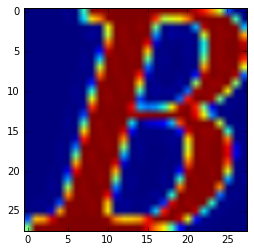

In [233]:
## sample training set
i = random.choice(range(len(train_labels)))
print i
print train_labels[i]
plt.imshow(train_dataset[i,:,:])

18276
9


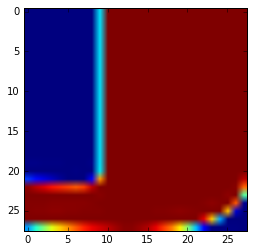

In [246]:
i = random.choice(range(len(test_labels)))
print i
print test_labels[i]
plt.imshow(test_dataset[i,:,:])

Next, we'll randomize the data. It's important to have the labels well shuffled for the training and test distributions to match.

In [247]:
np.random.seed(133)
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)

---
Problem 3
---------
Convince yourself that the data is still good after shuffling!

---

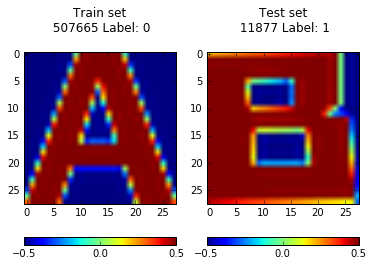

In [356]:
## from matplotlib tutorial
## http://matplotlib.org/users/image_tutorial.html

i = random.choice(range(len(train_labels)))
j = random.choice(range(len(test_labels)))

fig = plt.figure()
a=fig.add_subplot(1,2,1)
img = plt.imshow(train_dataset[i,:,:])
title = 'Train set\n {} Label: {}\n'.format(i, str(train_labels[i]))
a.set_title(title)
plt.colorbar(ticks=[-.5,0,.5], orientation ='horizontal')

a=fig.add_subplot(1,2,2)
img = plt.imshow(test_dataset[j,:,:])
title = 'Test set\n {} Label: {}\n'.format(j, str(test_labels[j]))
a.set_title(title)
plt.colorbar(ticks=[-.5,0,.5], orientation ='horizontal')

plt.show()

---
Problem 4
---------
Another check: we expect the data to be balanced across classes. Verify that.

---

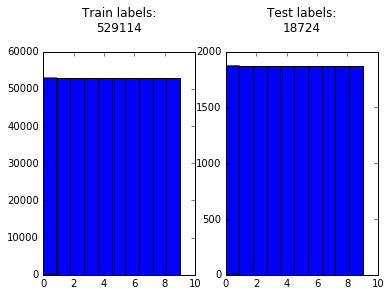

In [357]:
## look at histogram of class labels

fig = plt.figure()
a=fig.add_subplot(1,2,1)
plt.hist(train_labels)
title = 'Train labels:\n{}\n'.format(len(train_labels))
a.set_title(title)

a=fig.add_subplot(1,2,2)
plt.hist(test_labels)
title = 'Test labels:\n{}\n'.format(len(test_labels))
a.set_title(title)

plt.show()

Prune the training data as needed
----------------------
Depending on your computer setup, you might not be able to fit it all in memory, and you can tune train_size as needed.

Also create a validation dataset for hyperparameter tuning.

In [358]:
train_size = 200000
valid_size = 10000

valid_dataset = train_dataset[:valid_size,:,:]
valid_labels = train_labels[:valid_size]
train_dataset = train_dataset[valid_size:valid_size+train_size,:,:]
train_labels = train_labels[valid_size:valid_size+train_size]
print 'Training', train_dataset.shape, train_labels.shape
print 'Validation', valid_dataset.shape, valid_labels.shape

Training (200000, 28, 28) (200000,)
Validation (10000, 28, 28) (10000,)


Finally, let's save the data for later reuse:

In [359]:
pickle_file = 'notMNIST.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print 'Unable to save data to', pickle_file, ':', e
  raise

In [ ]:
statinfo = os.stat(pickle_file)
print 'Compressed pickle size:', statinfo.st_size

Load pickled data
-------------
http://deeplearning.net/software/theano/tutorial/loading_and_saving.html

In [3]:
pickle_file = 'notMNIST.pickle'

f = open(pickle_file, 'rb')
loaded_obj = pickle.load(f)
f.close()

In [5]:
loaded_obj.keys()

['train_labels',
 'valid_labels',
 'test_labels',
 'test_dataset',
 'train_dataset',
 'valid_dataset']

In [6]:
for key,val in loaded_obj.items():
    exec(key + '=val')

---
Problem 5
---------

By construction, this dataset might contain a lot of overlapping samples, including training data that's also contained in the validation and test set! Overlap between training and test can skew the results if you expect to use your model in an environment where there is never an overlap, but are actually ok if you expect to see training samples recur when you use it.
Measure how much overlap there is between training, validation and test samples.
Optional questions:
- What about near duplicates between datasets? (images that are almost identical)
- Create a sanitized validation and test set, and compare your accuracy on those in subsequent assignments.
---

In [102]:
## see how np unique method works
a = np.array([3,1,2,3])
np.unique(a, return_index=True)
np.unique(a, return_inverse=True)

(array([1, 2, 3]), array([2, 0, 1, 2]))

In [94]:
## find dupe images in train and validation sets
def unique(a):
    order = np.lexsort(a.T)
    a = a[order]
    diff = np.diff(a, axis=0)
    ui = np.ones(len(a), 'bool')
    ui[1:] = (diff != 0).any(axis=1) 
    return a[ui]

In [106]:
print valid_dataset.shape
unique(np.reshape(valid_dataset, (len(valid_dataset), image_len))).shape

(10000, 28, 28)


(9843, 784)

In [111]:
for set in [train_dataset, valid_dataset, test_dataset]:
    print set.shape, ':'
    print unique(np.reshape(set, (len(set), image_len))).shape

(200000, 28, 28) :
(187322, 784)
(10000, 28, 28) :
(9843, 784)
(18724, 28, 28) :
(18232, 784)


---
Problem 6
---------

Let's get an idea of what an off-the-shelf classifier can give you on this data. It's always good to check that there is something to learn, and that it's a problem that is not so trivial that a canned solution solves it.

Train a simple model on this data using 50, 100, 1000 and 5000 training samples. Hint: you can use the LogisticRegression model from sklearn.linear_model.

Optional question: train an off-the-shelf model on all the data!

---

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [510]:
## choose number of samples to train model
n = 5000
image_len = len(train_dataset[0]) * len(train_dataset[0][0])

## reshape img data to 1d array
train_dataset_n = np.reshape(train_dataset[:n], (n, image_len))
train_labels_n = train_labels[:n]

## create and fit the classifier
clf = LogisticRegression(random_state=111, multi_class='multinomial', solver='newton-cg')
clf.fit(train_dataset_n, train_labels_n)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          penalty='l2', random_state=111, solver='newton-cg', tol=0.0001,
          verbose=0)

In [511]:
## score the model on validation set
valid_dataset_reshape = np.reshape(valid_dataset, (len(valid_dataset), image_len))

print 'Mean accuracy: {}'.format(clf.score(valid_dataset_reshape, valid_labels))

Mean accuracy: 0.8309


In [512]:
## show a classification report
from sklearn import metrics

print metrics.classification_report(valid_labels, clf.predict(valid_dataset_reshape))

             precision    recall  f1-score   support

          0       0.86      0.84      0.85      1033
          1       0.86      0.79      0.83      1014
          2       0.85      0.84      0.85      1008
          3       0.84      0.85      0.84       985
          4       0.83      0.79      0.81       956
          5       0.83      0.86      0.85       962
          6       0.83      0.83      0.83      1038
          7       0.81      0.85      0.83       975
          8       0.78      0.80      0.79      1034
          9       0.83      0.85      0.84       995

avg / total       0.83      0.83      0.83     10000



In [513]:
## look at softmax probabilities of predicted labels
n = 5
print 'Labels:', np.hstack((valid_labels[:n], valid_labels[-n:]))
preds = clf.predict_proba(np.vstack((valid_dataset_reshape[:n], valid_dataset_reshape[-n:])))
print 'Predict:', [np.argmax(x) for x in preds]
for i in preds:
    print 'Chose {:d}, Softmax {:.4f}'.format(np.argmax(i), max(i))
    print np.around(i, decimals=4)


Labels: [7 7 6 7 7 1 2 1 8 9]
Predict: [7, 7, 6, 7, 7, 5, 2, 1, 8, 2]
Chose 7, Softmax 0.2153
[ 0.17    0.1899  0.0026  0.0558  0.1482  0.0651  0.0784  0.2153  0.0567
  0.018 ]
Chose 7, Softmax 0.2150
[ 0.1693  0.1056  0.0075  0.0833  0.1183  0.1746  0.0386  0.215   0.0626
  0.0251]
Chose 6, Softmax 0.2103
[ 0.1013  0.0489  0.1595  0.0085  0.0473  0.149   0.2103  0.116   0.0426
  0.1164]
Chose 7, Softmax 0.2180
[ 0.1747  0.1618  0.0025  0.0609  0.1685  0.1342  0.0484  0.218   0.0191
  0.012 ]
Chose 7, Softmax 0.2176
[ 0.205   0.1649  0.0005  0.0502  0.1604  0.1285  0.0168  0.2176  0.0428
  0.0134]
Chose 5, Softmax 0.1973
[ 0.0331  0.1673  0.0185  0.1072  0.1338  0.1973  0.0663  0.0828  0.1717
  0.022 ]
Chose 2, Softmax 0.2316
[ 0.0617  0.0327  0.2316  0.0385  0.2104  0.1067  0.2271  0.0765  0.01
  0.0048]
Chose 1, Softmax 0.2092
[ 0.1167  0.2092  0.0071  0.1779  0.1007  0.0351  0.0553  0.0999  0.0816
  0.1166]
Chose 8, Softmax 0.2012
[ 0.1248  0.1207  0.014   0.1095  0.1243  0.0131  0.

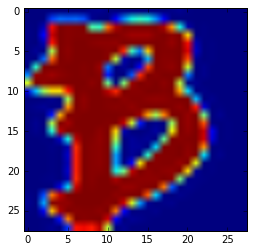

In [515]:
## look at incorrect predictions
plt.imshow(valid_dataset[-5,:,:])